# Initial ML and EDA

## Task 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("task-1.csv")
data.head()

,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


In [8]:
x = data.x.values
y = data.y.values

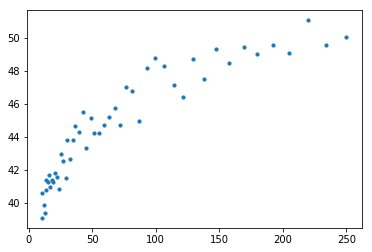

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x,y,s=10)

In [56]:
x_values = np.linspace(x.min(),x.max(),num=100)
coefs = np.polyfit(np.log(x),y,deg=1)
y_values = np.polyval(coefs, np.log(x_values))

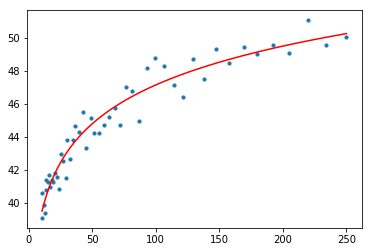

In [57]:
plt.scatter(x,y,s=10)
plt.plot(x_values,y_values,c="red")

In [58]:
y_pred = np.polyval(coefs,np.log(x))

In [63]:
def RSS(y,y_pred):
    return np.sum(np.square(y-y_pred))

rss = RSS(y,y_pred)
rss_base = RSS(y,np.mean(y))
r2 = 1-(rss/rss_base)
print("RSS :",rss)
print("RSS Baseline :",rss_base)
print("R2 :",r2)

RSS : 31.8426517527567
RSS Baseline : 541.1432872199999
R2 : 0.9411567093138288


We see that the R2 score is close to 1, so our model makes few errors.

## Task 2

In [64]:
data2 = pd.read_csv("task-2.csv")
data2.head()

,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


In [106]:
X=data2.drop("y",axis=1)
y=data2.y

In [107]:
from sklearn.model_selection import train_test_split

X_tr,X_te,y_tr,y_te = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error as MAE

pipe_ridge = Pipeline([
    ("scaler",StandardScaler()),
    ("ridge",Ridge())
])

pipe_ridge.fit(X_tr,y_tr)
print("MAE with outliers on linear regression :",round(MAE(y_te,pipe_ridge.predict(X_te)),3))

MAE with outliers on linear regression : 104.801


In [109]:
pipe_huber = Pipeline([
    ("scaler",StandardScaler()),
    ("huber",HuberRegressor())
])

pipe_huber.fit(X_tr,y_tr)
print("MAE with outliers on huber regression :",round(MAE(y_te,pipe_huber.predict(X_te)),3))

MAE with outliers on huber regression : 83.912


Let's look at our distributions of X_tr features

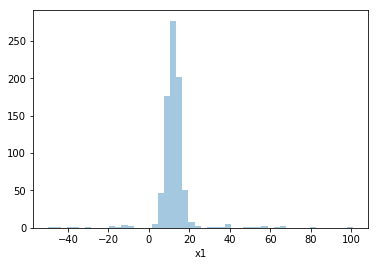

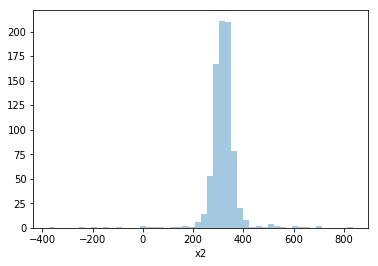

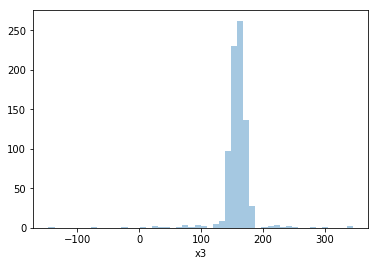

In [129]:
import seaborn as sns
for c in X_tr:
    plt.figure()
    sns.distplot(X_tr[c],kde=False)

We see that there are some outliers in the data, lets remove them

In [113]:
filter_all = np.abs(X_tr-X_tr.mean())>(3*X_tr.std())

In [115]:
filter_any = filter_all.any(axis=1)

In [117]:
filter_any.sum()

38

In [120]:
outliers = X_tr.loc[filter_any, :]
outliers.shape

(38, 3)

In [125]:
X_trwo = X_tr.drop(outliers.index)
y_trwo = y_tr.drop(outliers.index)

In [128]:
pipe_ridgewo = Pipeline([
    ("scaler",StandardScaler()),
    ("ridge",Ridge())
])

pipe_ridgewo.fit(X_trwo,y_trwo)
print("MAE without outliers on linear regression :",round(MAE(y_te,pipe_ridgewo.predict(X_te)),3))

MAE without outliers on linear regression : 71.065
